# **Project Name - Yes Bank Stock Closing Price Prediction Supervised ML**
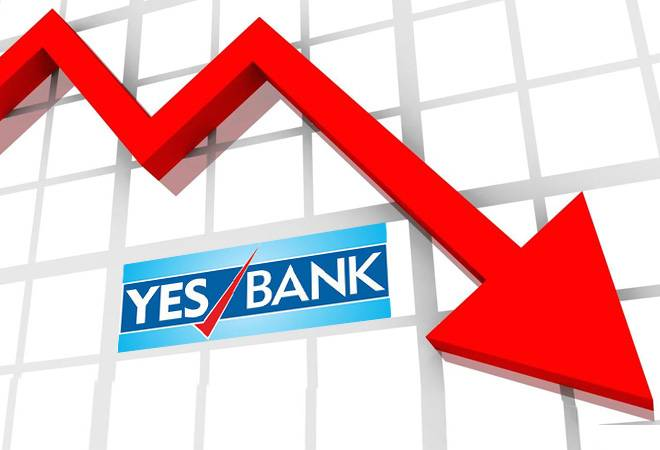

##### **Project Type**    - Spervised Regression
##### **Contribution**    - Individual
##### **Team Member -** Sambit Pani

# **Project Summary -**

The project is related to stock market analysis. Here monthly stock closing price needs to be predicted by using the ML model algorithm. As the output suggests that it is a continuous value. So we can use regression model to analyse and predict the data. We will feed the data and predict as per the model output. Then we will evaluate the same using the test data available with us.

# **GitHub Link -**

https://github.com/sambitpani-ds/Yes-Bank-Stock-Closing-Price-Prediction.git

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

# **Loading Libraries and the data undestanding**

---



In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso, Ridge, ElasticNet)
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (r2_score,mean_squared_error,  mean_absolute_percentage_error, mean_absolute_error)

from datetime import datetime

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 4/Capstone project LR/data_YesBank_StockPrices.csv')

In [ ]:
# first look at data
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# row and column of the data
df.shape

(185, 5)

In [ ]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

###**Data Description**
Data set has 185 rows having all non-null values. it has 5 columns. Open,High,Low,Close and Date. So using only 4 values we try to predict the Close value.
On top of that there is no duplicated values and nan values in the dataset.

In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


## **Variable description**
**Date :** It is the date taken as the beginning of the month from which readings has been taken. \
**Open :** It is the month opening price. i.e. the price at the beginning of the month.\
**Close :** It is the closing price of the month. i.e. the price at the end of the month.\
**High :** It is the highest price throughout the month.\
**Low :** It is the lowest price throughout the month.

# **Data Wrangling**

In [ ]:
# Write your code to make your dataset analysis ready.
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,"%b-%y"))

In [ ]:
# pivot point is the mean of high,low and close. It acts crucial role in stock prices behavior.
df['pivot'] = round((df['High']+df['Low']+df['Open'])/3,2)

In [ ]:
# adding month number from date as there is a quarterly result associated with the company. SO month is important.
# adding year from starting of the stock.
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year-2004

In [ ]:
df.head(2)

,Date,Open,High,Low,Close,pivot,month,year
0,2005-07-01,13.00,14.00,11.25,12.46,12.75,7,1
1,2005-08-01,12.58,14.88,12.55,13.42,13.34,8,1


1. I changed the date format from object to Datetime.
2. I add 3 more columns for checking the usefulness.

# **Data Analysis**

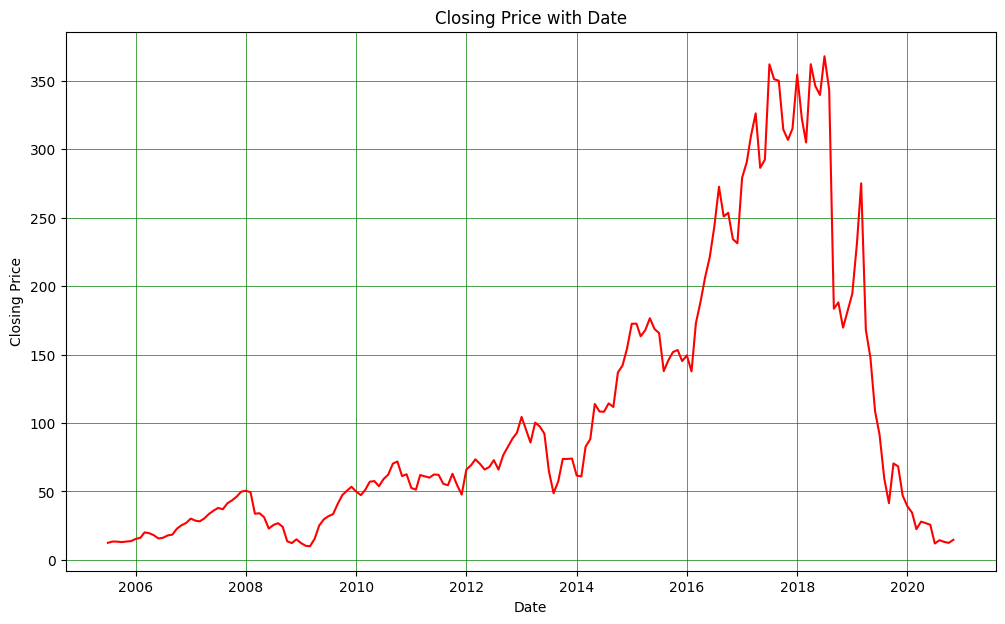

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df['Date'],df['Close'] ,color = 'r')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price with Date')
plt.show()

It has been clearly seen that how share price fall after 2008 fraud case.

<Axes: xlabel='Close', ylabel='Density'>

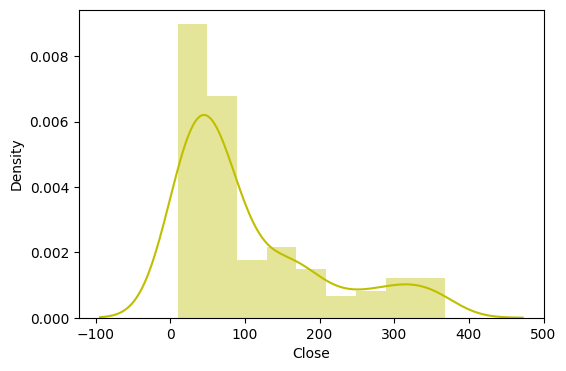

In [ ]:
# Dependent variable 'Close'
plt.figure(figsize=(6,4))
sns.distplot(df['Close'],color="y")

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close', 'pivot', 'month', 'year'], dtype='object')

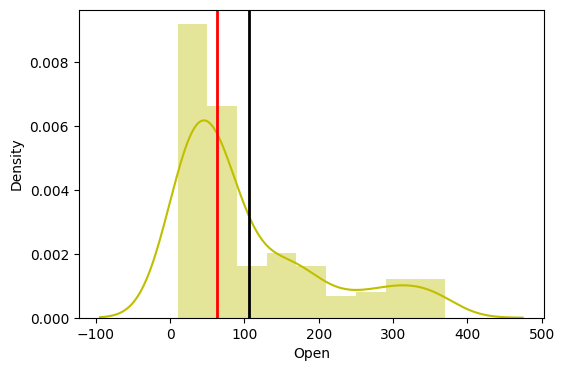

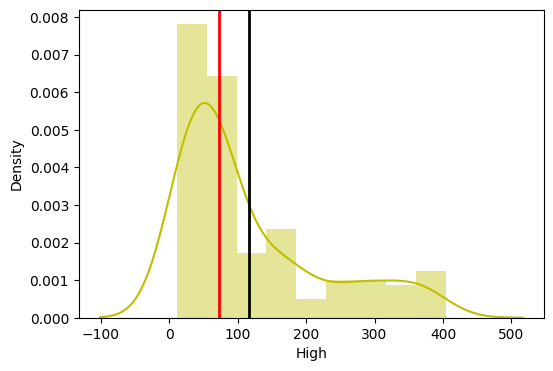

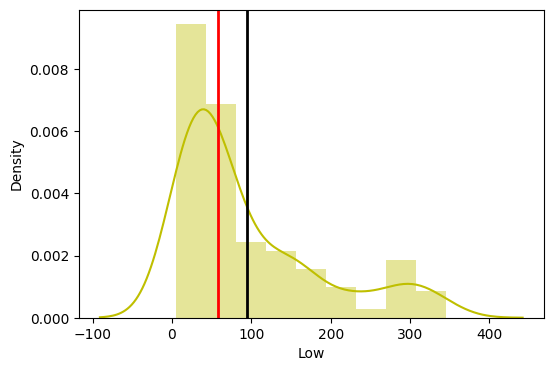

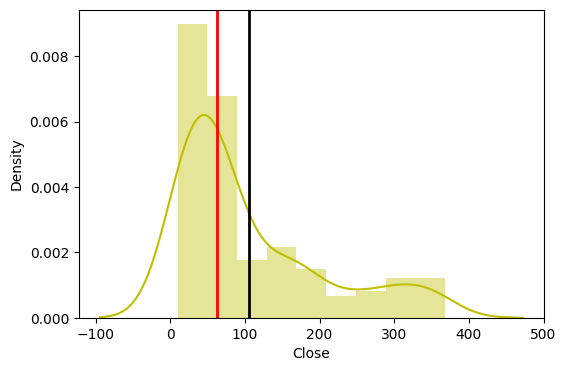

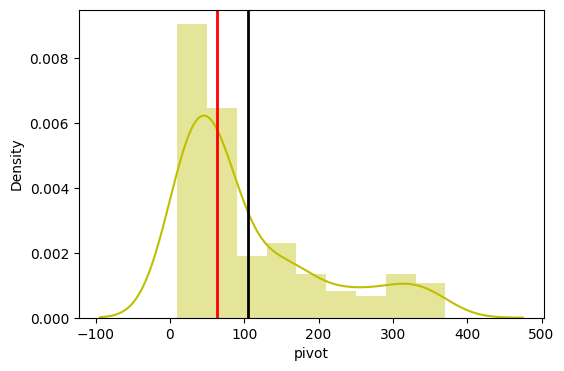

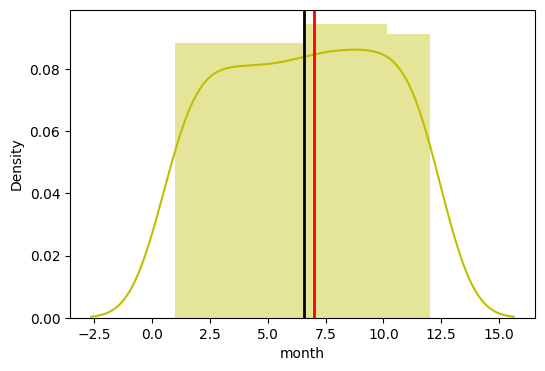

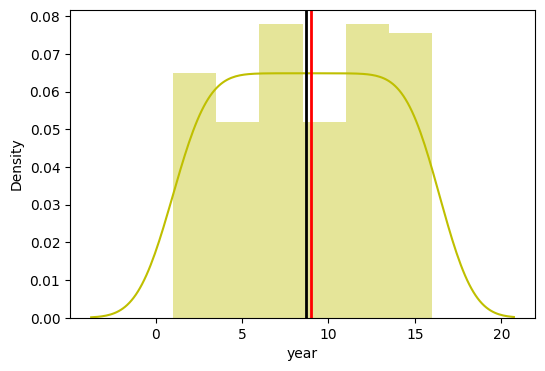

In [ ]:
# plot of independent variable
for col in numeric_features:
  plt.figure(figsize=(6,4))
  ax = sns.distplot(df[col],color="y")
  ax.axvline(df[col].mean(),color = 'k',lw=2)
  ax.axvline(df[col].median(),color = 'r',lw=2)

1. It can be seen that high,low,open and close all have moderate positive skew. SO we will aplly log transformation on them.

In [ ]:
df[numeric_features].agg(['skew'])

,Open,High,Low,Close,pivot,month,year
skew,1.265717,1.229027,1.303268,1.264725,1.249366,-0.038914,-0.00794


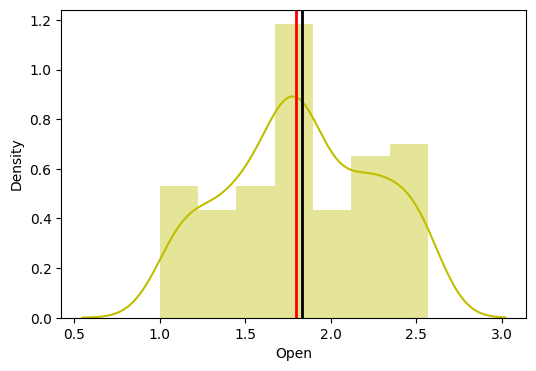

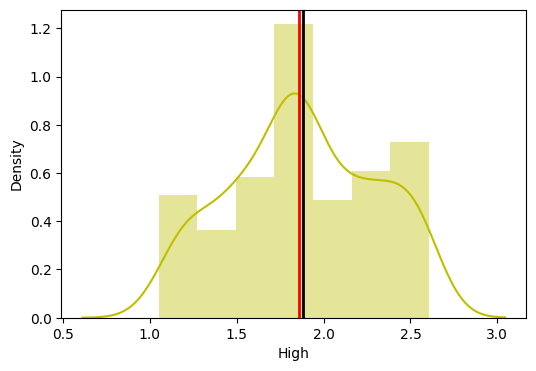

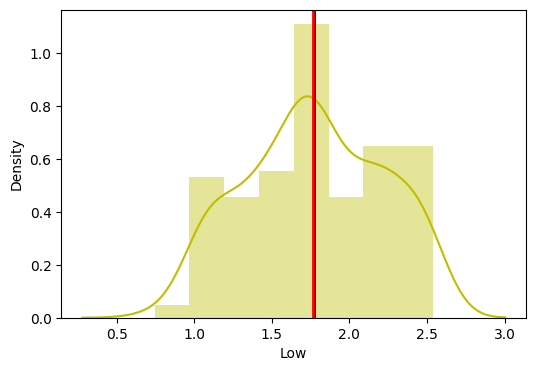

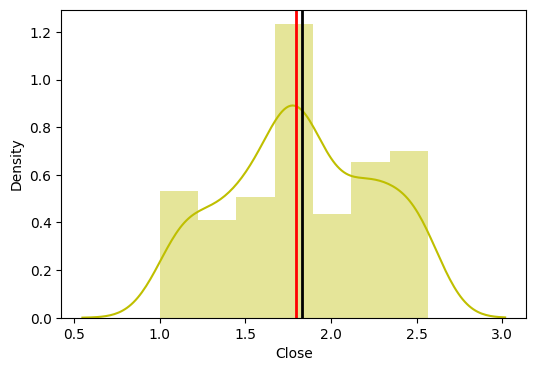

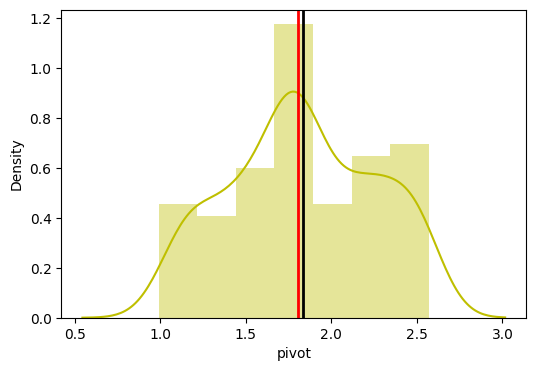

In [ ]:
# For right skewed log transformation.
for col in numeric_features[:-2]:
  plt.figure(figsize=(6,4))
  ax = sns.distplot(np.log10(df[col]),color="y")
  ax.axvline(np.log10(df[col]).mean(),color = 'k',lw=2)
  ax.axvline(np.log10(df[col]).median(),color = 'r',lw=2)

> Now mean and meadian are nearer than the previous graph. They are looking good to go ahead.

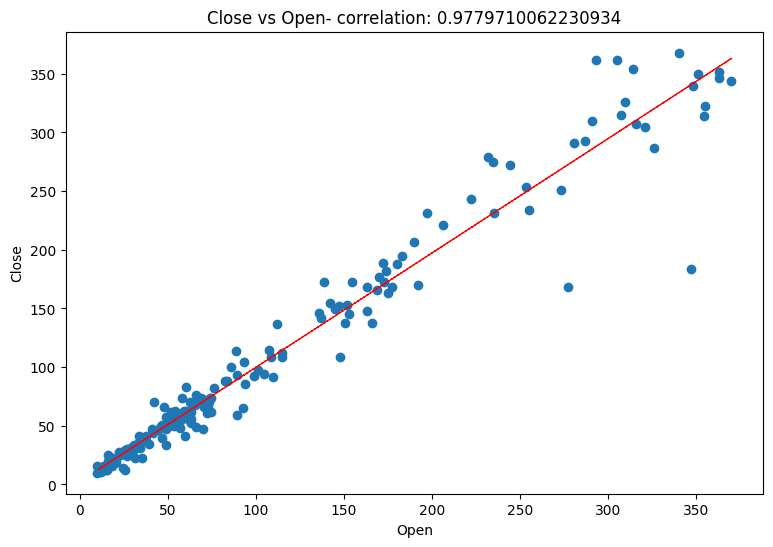

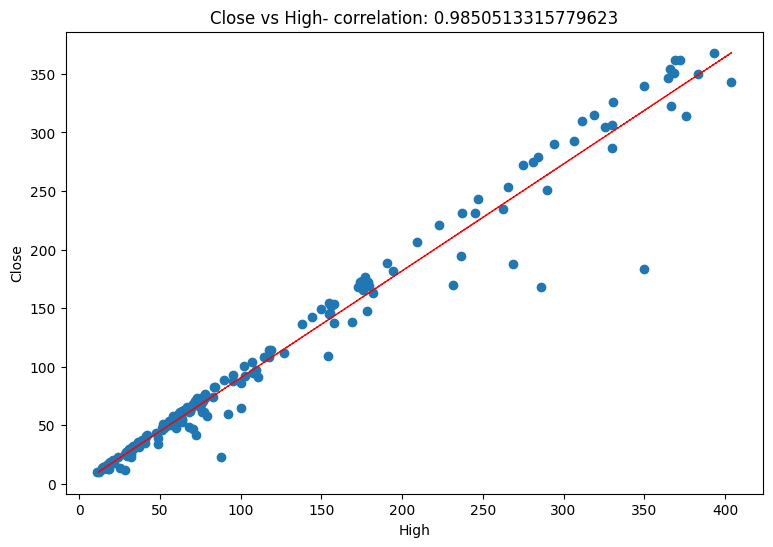

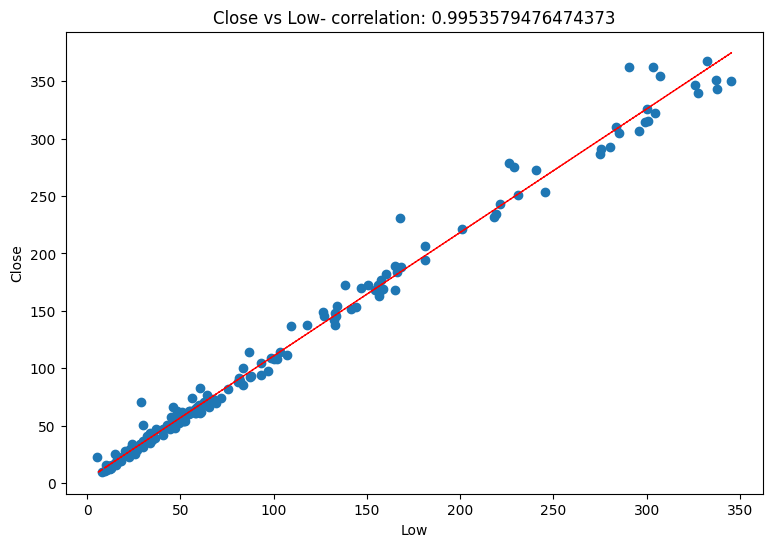

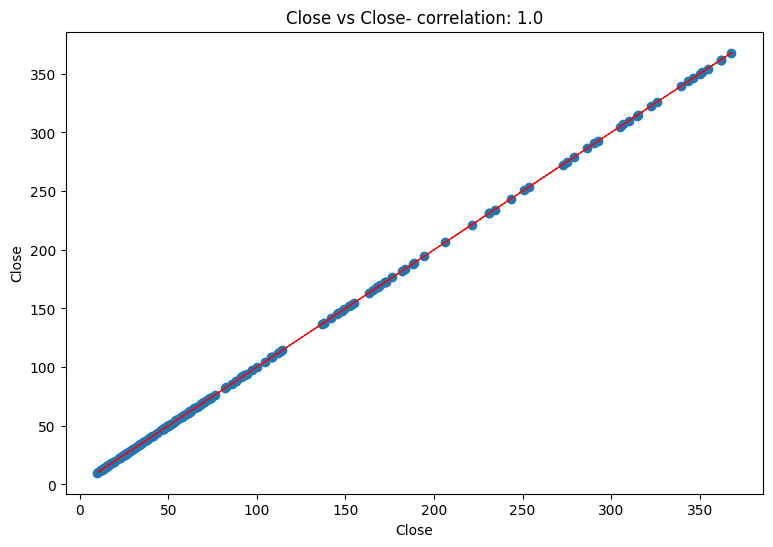

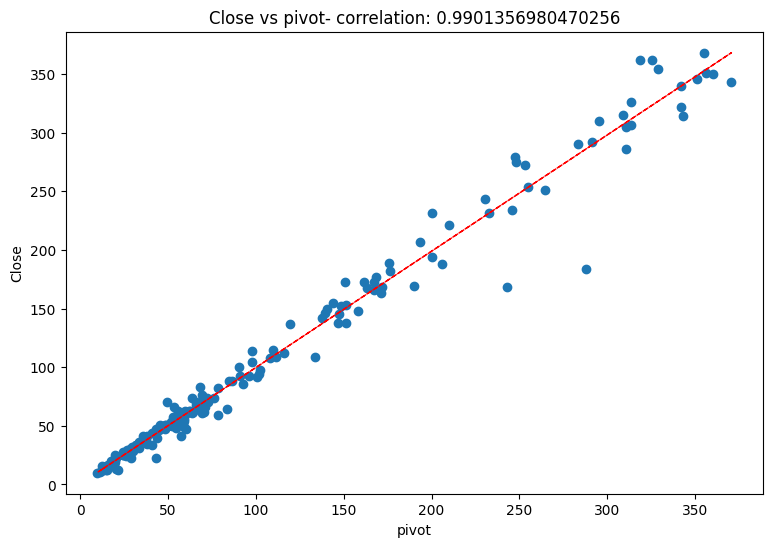

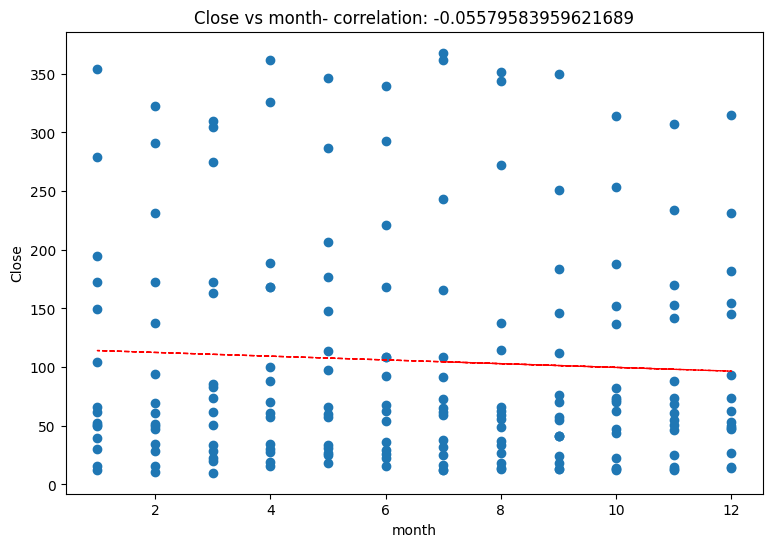

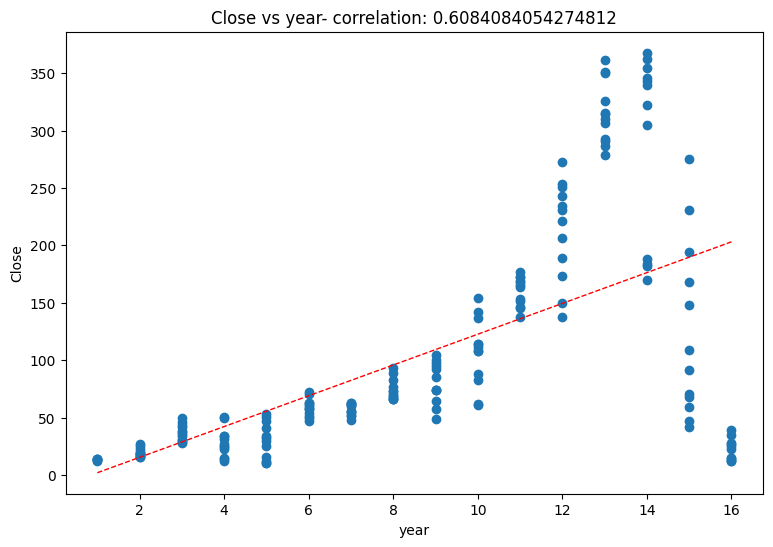

In [ ]:
# checking for heteroscedacity.
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Close'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

> The dependent variables is highly correlated with independent variables.\
> Also both are near to linearly correlated.

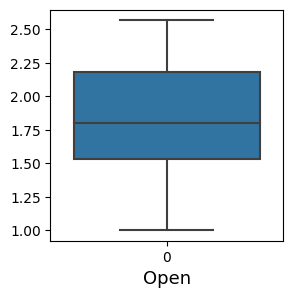

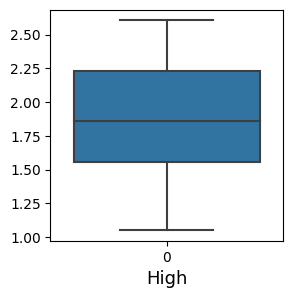

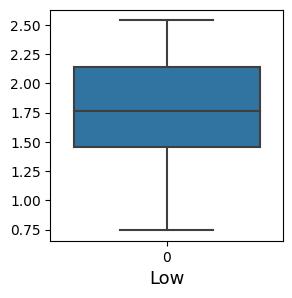

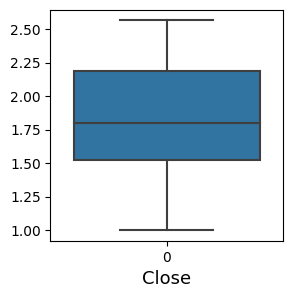

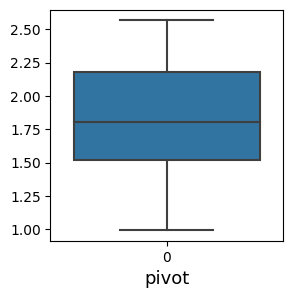

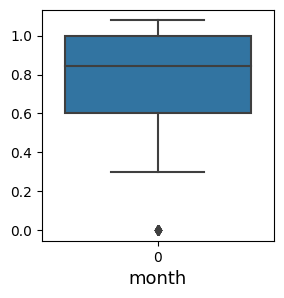

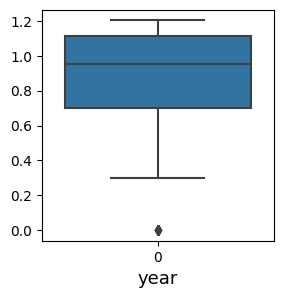

In [ ]:
# Box plot to see outliers.

for col in numeric_features:
  plt.figure(figsize=(3,3))
  sns.boxplot(np.log10(df[col]))
  plt.xlabel(col, fontsize=13)
  plt.show()

In this data very less number of outliers will be seen.

<Axes: >

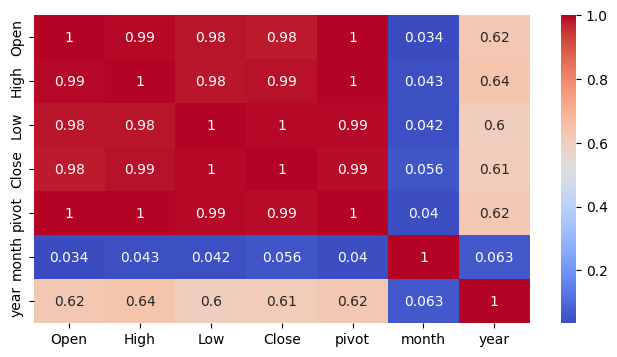

In [ ]:
## Correlation
plt.figure(figsize=(8,4))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

> The dependent varibale is highly corelated to open,high,low,close.

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in numeric_features if i not in ['Open','High','Close','Low']]])

,variables,VIF
0,pivot,3.521748
1,month,2.513890
2,year,5.251269


In [ ]:
independent_variables = ['pivot','month','year']

We can see the correlation among high,low,open is vary high. SO i have selected only pivot, which is the average of all high,low and open.

# **Data Preparation :-**

In [ ]:
df_copy = df.copy()
df_copy.shape

(185, 8)

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = np.log10(df_copy[independent_variables]).values
y = np.log10(df['Close']).values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


# **Linear Regression**

In [ ]:
# Linear regression model
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.9826986820067273

In [ ]:
reg.coef_

array([ 1.03042106, -0.0147707 , -0.06276447])

In [ ]:
y_pred_linear = reg.predict(X_test)

In [ ]:
# I have created two dataset to store and compare metrices and model parameters at the end.
metrics_comp = ['MSE','RMSE','R2','Adj R2']
coeff = ['pivot','month','year']
df_metrics = pd.DataFrame(metrics_comp,columns=['Metrics'])
df_coeff = pd.DataFrame(coeff,columns=['Coefficient'])
print(df_coeff)
df_metrics

  Coefficient
0       pivot
1       month
2        year


,Metrics
0,MSE
1,RMSE
2,R2
3,Adj R2


In [ ]:
# metrices
from sklearn.metrics import mean_squared_error

MSE_linear = round(mean_squared_error((10**y_test),10**(y_pred_linear)),4)
print(f"Mean squared Error : {MSE_linear}")

RMSE_linear = round(np.sqrt(MSE_linear),4)
print(f"Root Mean squared Error : {RMSE_linear}")

R2_linear = round(r2_score(10**(y_test), 10**(y_pred_linear)),4)
print(f"R2 score : {R2_linear}")

Adjusted_R2_linear = round(1-(1-r2_score(10**y_test,10**y_pred_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print(f"Adjusted R2 score : {Adjusted_R2_linear}")
df_metrics['Linear'] = [MSE_linear,RMSE_linear,R2_linear,Adjusted_R2_linear]
df_coeff['Linear'] = reg.coef_

Mean squared Error : 155.3457
Root Mean squared Error : 12.4638
R2 score : 0.9862
Adjusted R2 score : 0.985


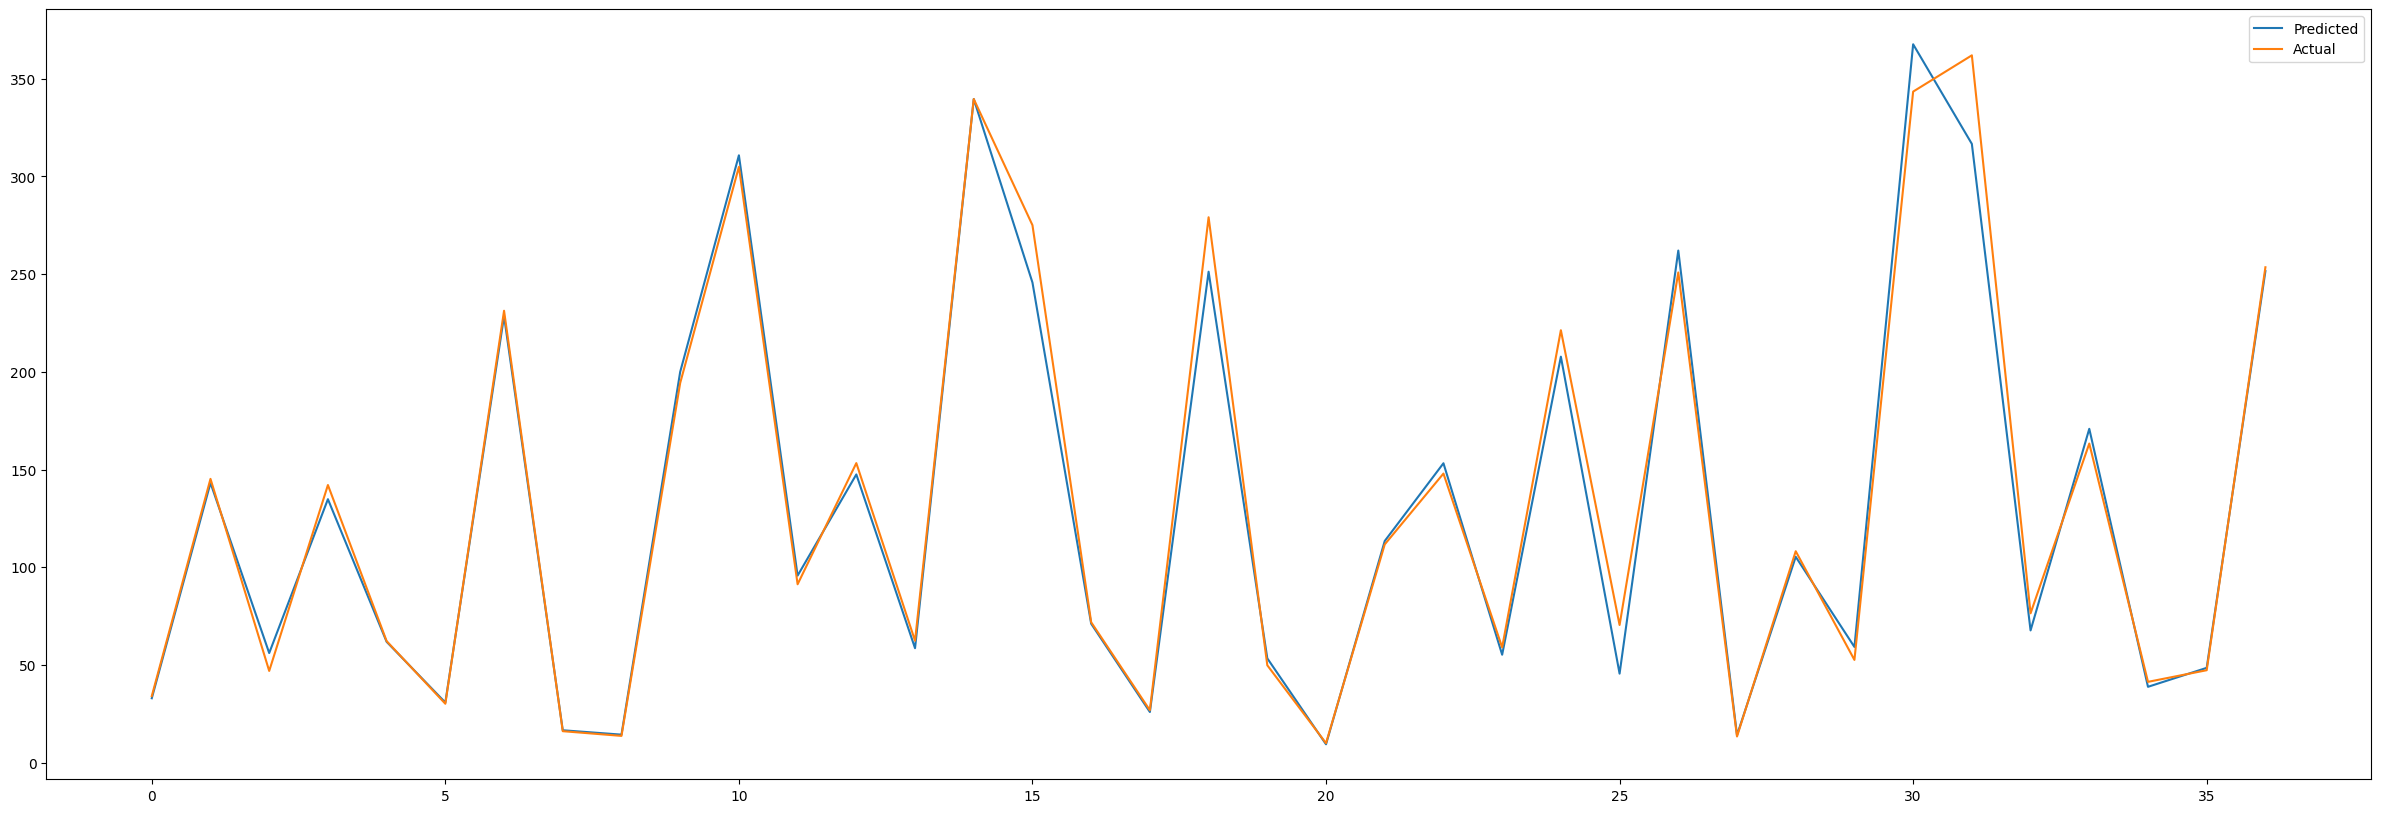

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(10**(y_pred_linear))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#**Lasso Regression :-**

In [ ]:
# lasso regularization
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=1e-15 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=1e-15, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.9826986820067273

In [ ]:
df_coeff['Lasso'] = lasso.coef_
lasso.coef_

array([ 1.03042106, -0.0147707 , -0.06276447])

In [ ]:
y_pred_lasso = lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 155.34566395844152
RMSE : 12.463774065604749
R2 : 0.9861987375831558
Adjusted R2 :  0.9849440773634427


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(X_train, y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.00336573243011893


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
df_metrics['Lasso'] = [MSE,RMSE,r2,1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

MSE : 155.34566395844152
RMSE : 12.463774065604749
R2 : 0.9861987375831558
Adjusted R2 :  0.9849440773634427


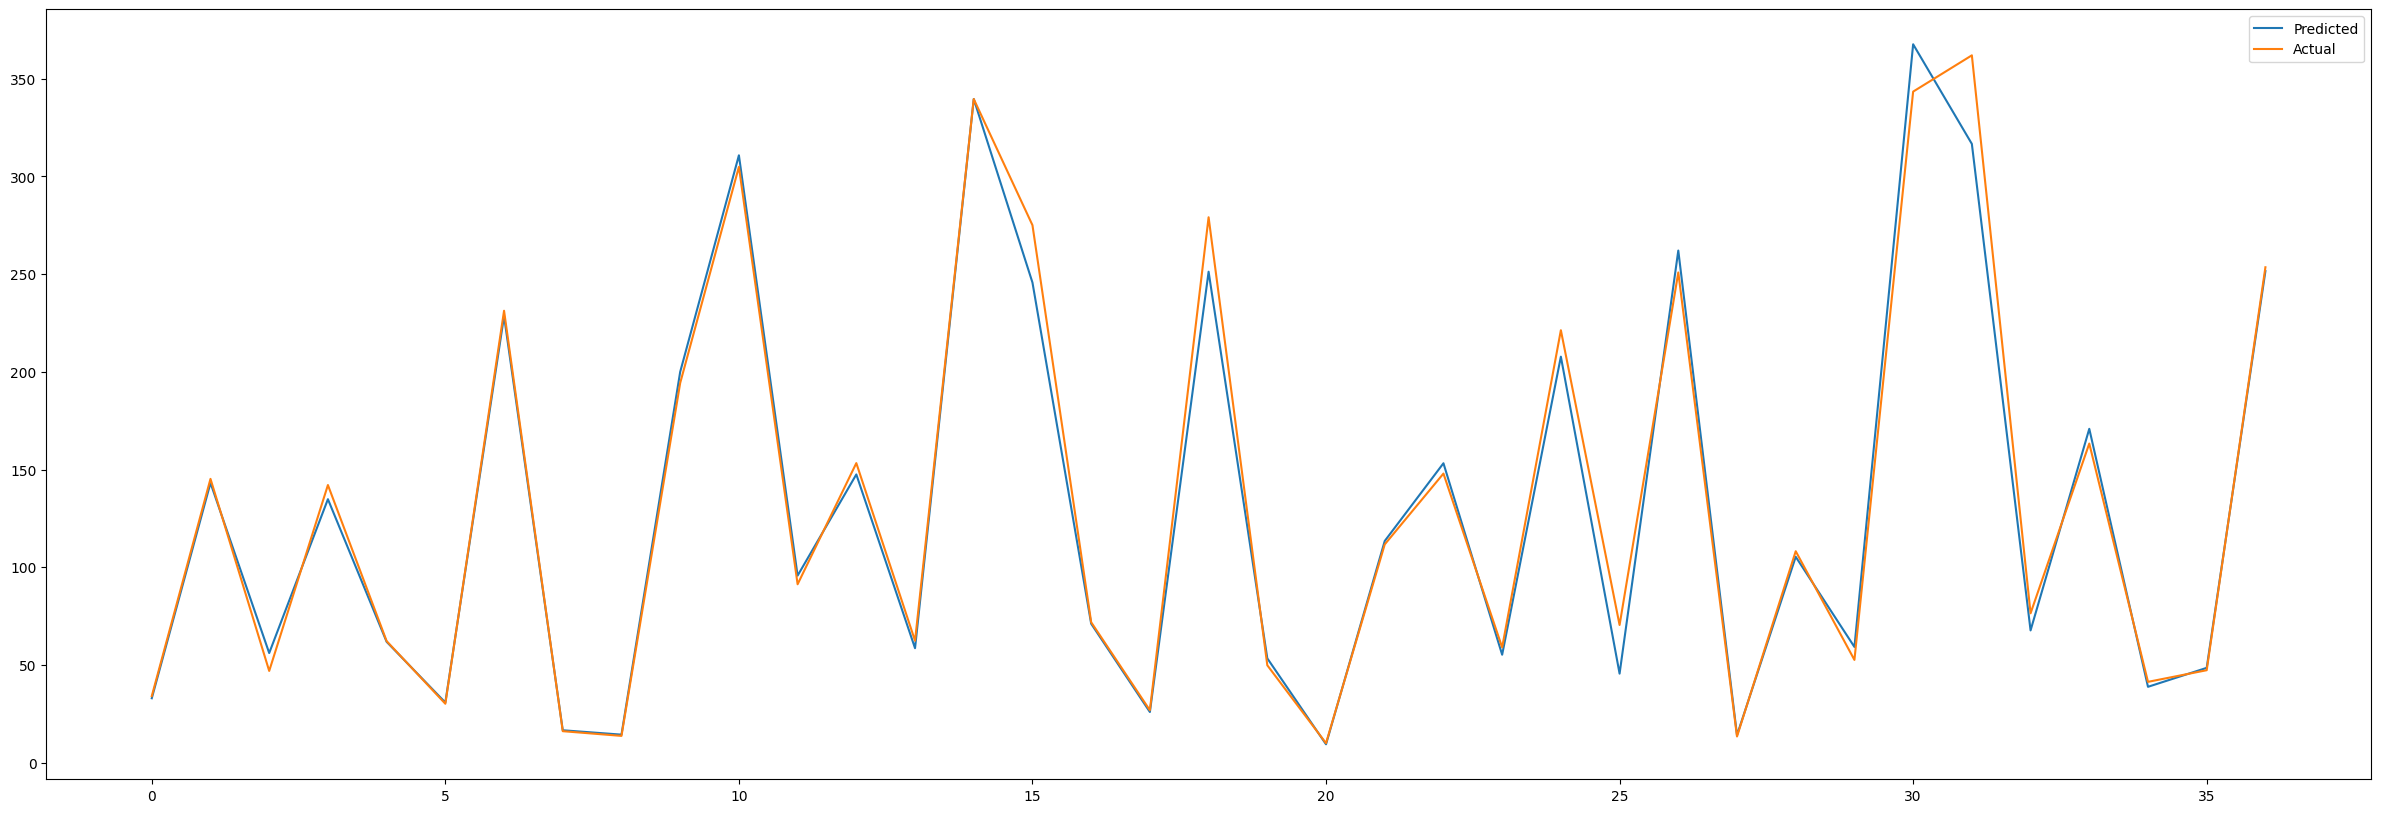

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(10**(y_pred_lasso))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#**Ridge Regression:-**

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=1e-15)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=1e-15)

In [ ]:
ridge.score(X_train, y_train)

0.9826986820067273

In [ ]:
df_coeff['Ridge'] = ridge.coef_

In [ ]:
y_pred_ridge = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 155.3456639584264
RMSE : 12.463774065604142
R2 : 0.9861987375831571
Adjusted R2 :  0.9849440773634441


In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.0036039083869264152


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
df_metrics['Ridge'] = [MSE,RMSE,r2,1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

MSE : 155.3456639584264
RMSE : 12.463774065604142
R2 : 0.9861987375831571
Adjusted R2 :  0.9849440773634441


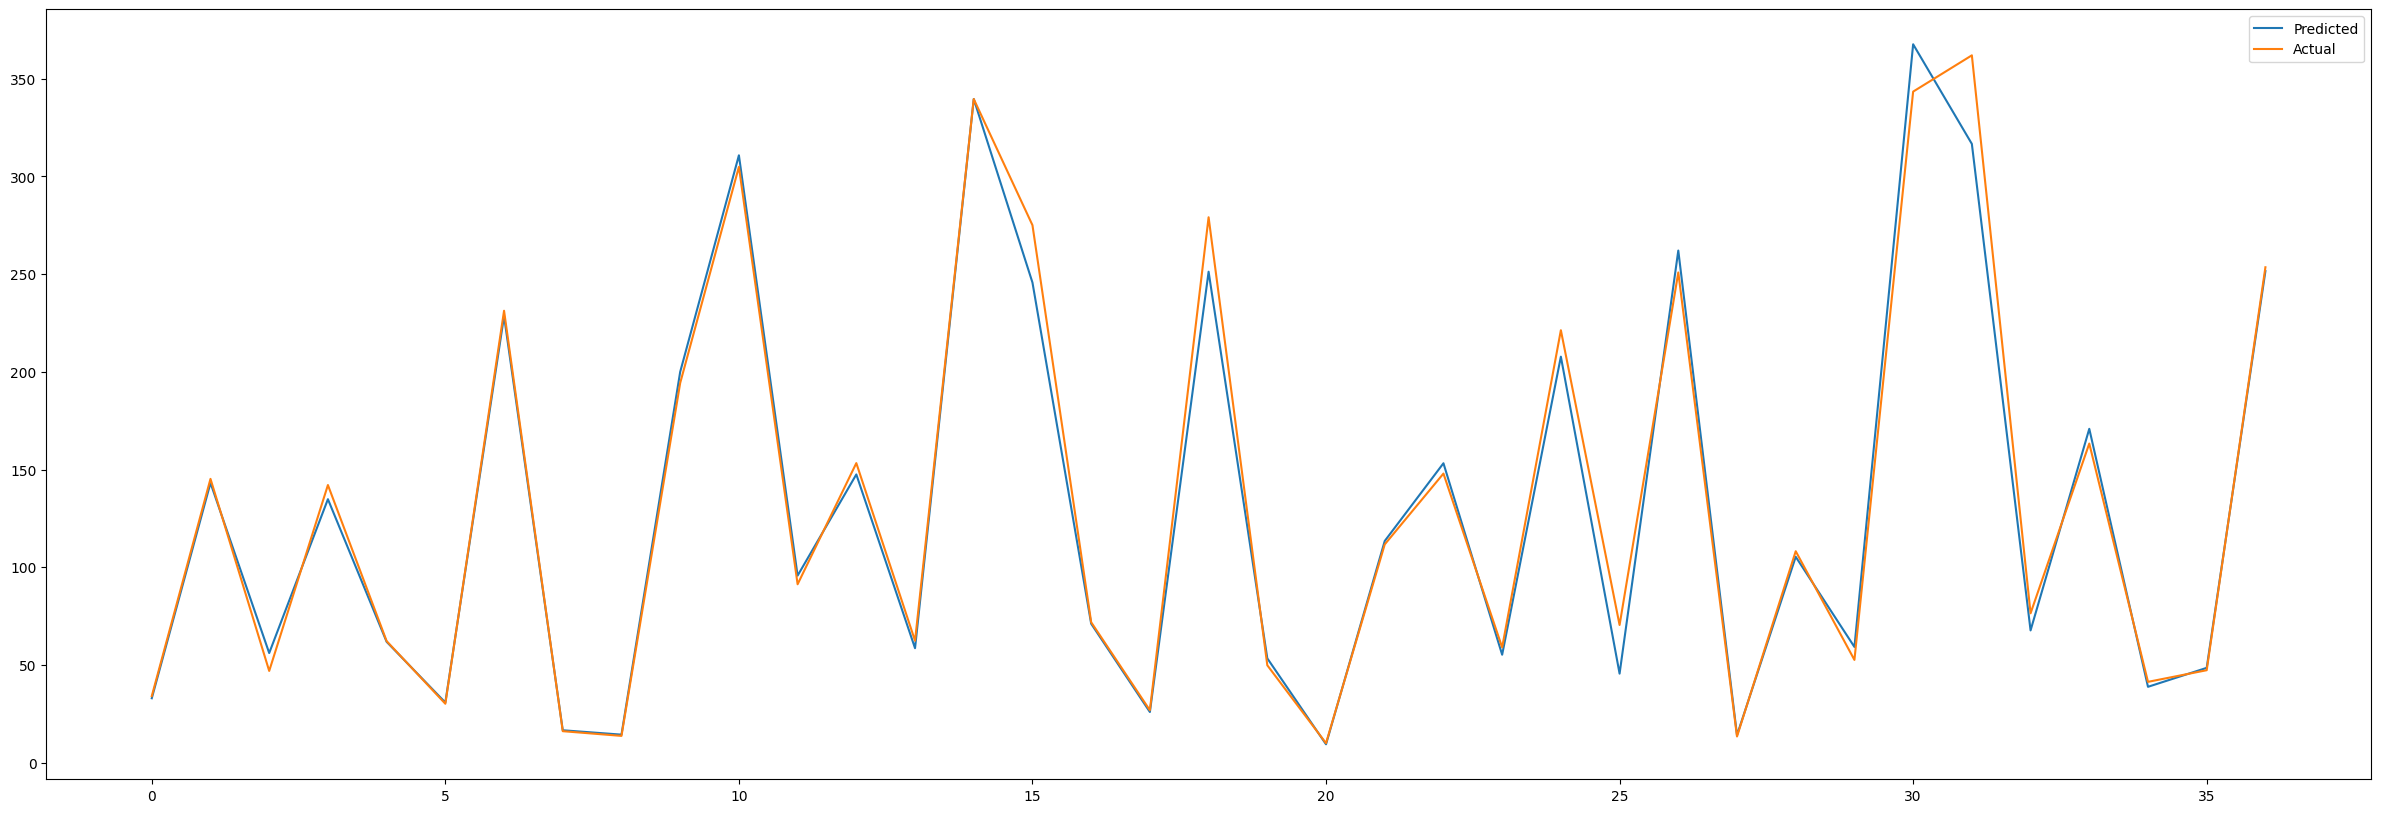

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(10**(y_pred_ridge))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **ElasticNet Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=1e-5, l1_ratio=0.1)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=1e-05, l1_ratio=0.1)

In [ ]:
df_coeff['ElasticNet'] = elasticnet.coef_

In [ ]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

# initializing parameter grid.
parameters = {'alpha': [1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

# cross-validation.
elasticnet_regressor = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error',cv=5)
elasticnet_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.1),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.001, 0.01, 0.02,
                                   0.03, 0.04, 1, 5, 10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elasticnet_regressor.best_params_)
print("\nUsing ",elasticnet_regressor.best_params_, " the negative mean squared error is: ", elasticnet_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05, 'l1_ratio': 0.1}

Using  {'alpha': 1e-05, 'l1_ratio': 0.1}  the negative mean squared error is:  -0.003514461607295966


In [ ]:
#Model Prediction
y_pred_elasticnet = elasticnet_regressor.predict(X_test)

In [ ]:
MSE_elasticnet  = mean_squared_error(10**(y_test), 10**(y_pred_elasticnet))
print("MSE :" , MSE)

RMSE_elasticnet = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_elasticnet = r2_score(10**(y_test), 10**(y_pred_elasticnet))
print("R2 :" ,r2_elasticnet)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elasticnet)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
df_metrics['ElasticNet'] = [MSE,RMSE,r2,1-(1-r2_score(10**(y_test), 10**(y_pred_elasticnet)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

MSE : 155.3456639584264
RMSE : 12.463774065604142
R2 : 0.9861914302073937
Adjusted R2 :  0.9849361056807932


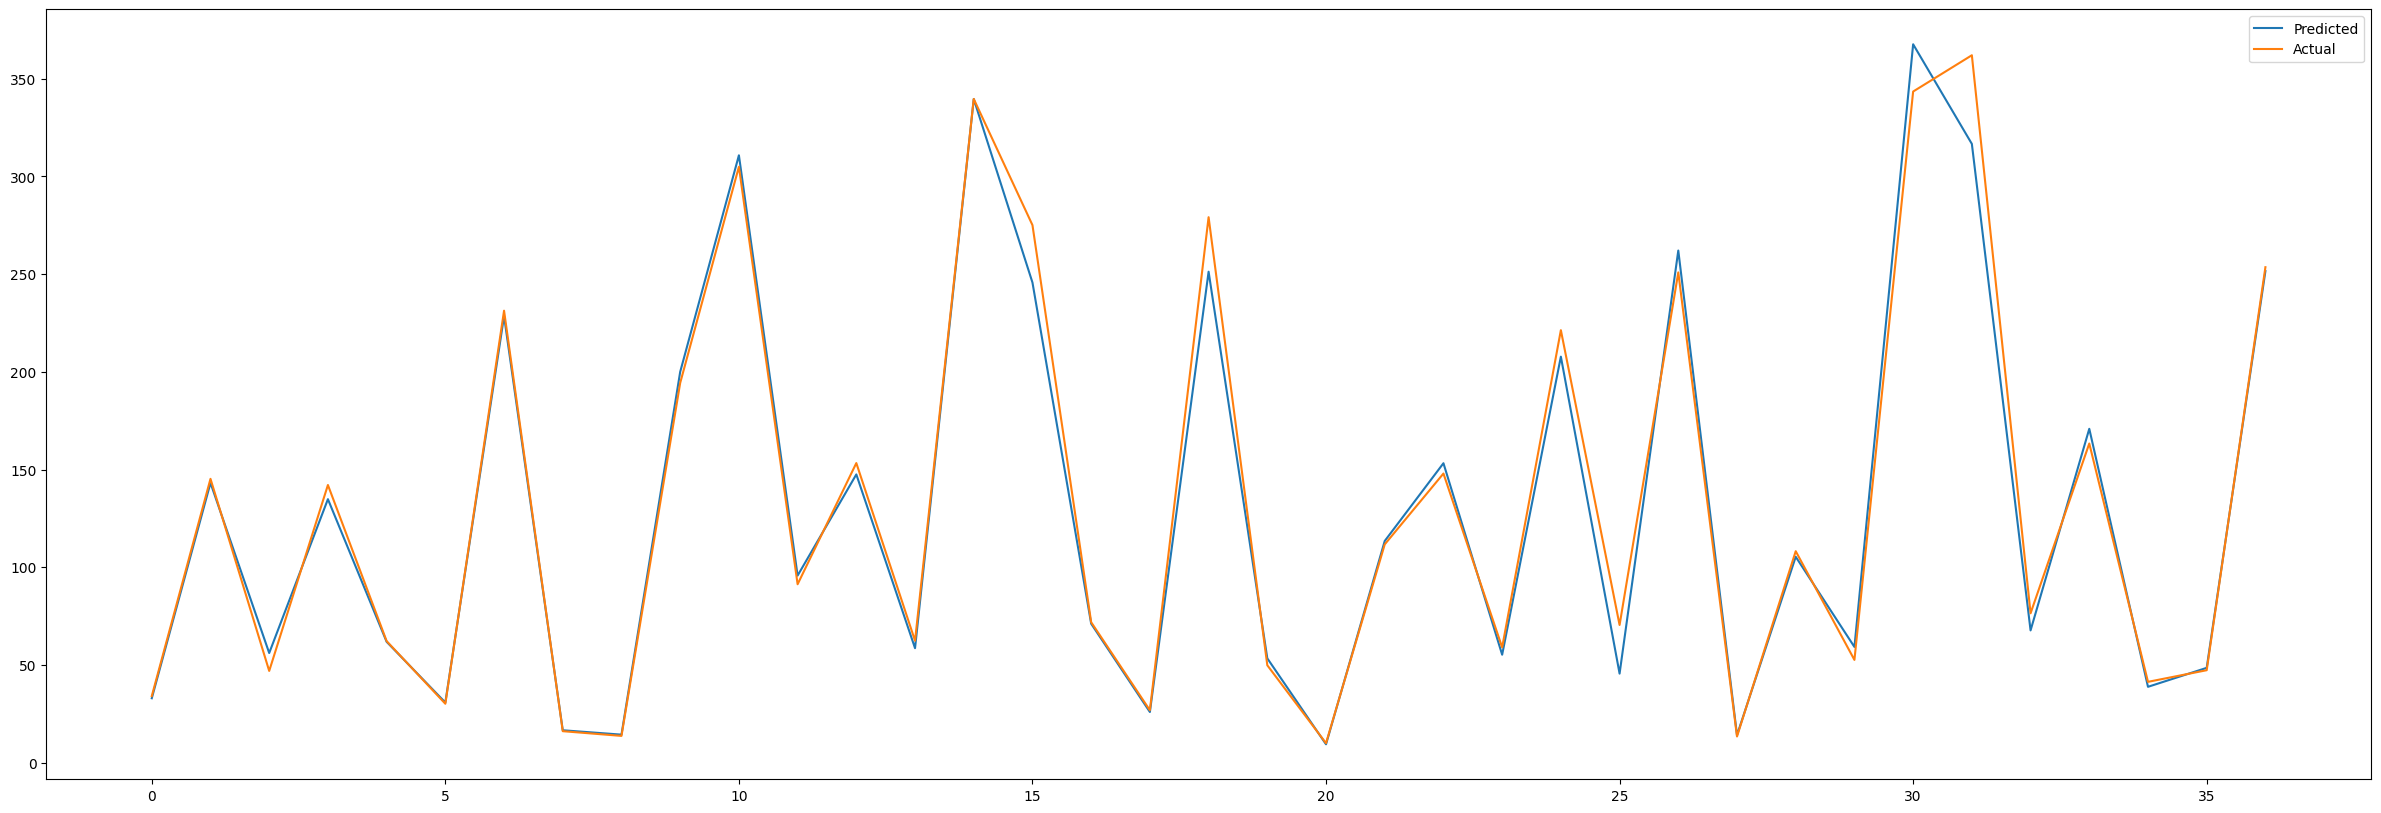

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(10**(y_pred_elasticnet))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

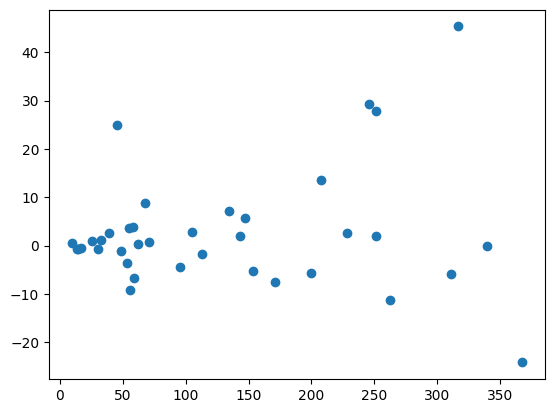

In [ ]:
plt.scatter(10**(y_pred_elasticnet),10**(y_test)-10**(y_pred_elasticnet))

# **Conclusion**

In [ ]:
df_metrics

,Metrics,Linear,Lasso,Ridge,ElasticNet
0,MSE,155.3457,155.345664,155.345664,155.345664
1,RMSE,12.4638,12.463774,12.463774,12.463774
2,R2,0.9862,0.986199,0.986199,0.986199
3,Adj R2,0.9850,0.984944,0.984944,0.984936


In [ ]:
df_coeff

,Coefficient,Linear,Lasso,Ridge,ElasticNet
0,pivot,1.030421,1.030421,1.030421,1.030296
1,month,-0.014771,-0.014771,-0.014771,-0.014755
2,year,-0.062764,-0.062764,-0.062764,-0.062628


    1.It has been seen that the stock price fall after 2008 fraud case.
    2. Again i found that the data comprises of 5 variables only.
    3. We created two more variables on date. One is month as it plays a crucial role as there is
    sector rotation and other financial result announcements.
    4. We found no null values in the data.
    5. Data is positively skewed so log transformation is applied.
    6. There is no outliers observed so the data is clean.
    7. There is no categorical column so no need for dummies.
    8. Then we model the data with 4 types of regressions.
    9. As per the above data Elastic net regression is quiet better in all the metrics. SO we will take this model for upcoming predictions.
    10. Also it has been found out that R2 value is more correlated with pivot.
    11. By seeing the model accuracy it could be used confidently for upcoming predictions.


# **Thank You !!**